### **Importing Libs**

In [ ]:
!pip install tensorflow-addons
!pip install git+https://github.com/tensorflow/examples.git
!pip install keras

     |████████████████████████████████| 679 kB 4.0 MB/s 


In [ ]:
from glob import glob
import os
from tensorflow_examples.models.pix2pix import pix2pix
import PIL
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime, os
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output
import tensorflow_addons as tfa

import h5py

from tqdm import tqdm
import pathlib
import urllib
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image

In [ ]:
# For more information about autotune:
# https://www.tensorflow.org/guide/data_performance#prefetching
AUTOTUNE = tf.data.experimental.AUTOTUNE
print(f"Tensorflow ver. {tf.__version__}")

Tensorflow ver. 2.5.0


### **Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


### Directory to the dataset

```
RIM-ONE-r3/dataset_v2/
  healthy/stereo
  healthy/average_mask
  glaucoma_suspect/stereo
  glaucoma_suspect/avg_mask
```

In [ ]:
dataset_path = "/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/"
healthy_path = dataset_path + "healthy/healthy_stereo/"
healthy_masked_path = dataset_path + "healthy/avg_healthy_mask/"
glaucoma_path = dataset_path + "glaucoma_suspect/glaucoma_stereo/"
glaucoma_masked_path = dataset_path + "glaucoma_suspect/glaucoma_suspect_avg_mask/"

In [ ]:
### Knowing the len of the images
stereo_healthy = len(list(glob(healthy_path + "*.jpg")))
print(f"The originally healthy stereo {stereo_healthy} images.")

masked_healthy = len(glob(healthy_masked_path + "*png"))
print(f"The masked healthy {masked_healthy} images.")

stereo_glaucoma = len(glob(glaucoma_path + "*.jpg"))
print(f"The originally glaucoma stereo {stereo_glaucoma} images.")

masked_glaucoma = len(glob(glaucoma_masked_path + "*png"))
print(f"The masked glaucoma {masked_glaucoma} images.")

The originally healthy stereo 85 images.
The masked healthy 170 images.
The originally glaucoma stereo 74 images.
The masked glaucoma 148 images.


format initiation for to separate the image between left right both Healthy and Glaucoma Suspected also the disc and cups

In [ ]:
def open_image(path, width, height):
    try :
        image = cv2.imread(path)
        image = cv2.resize(image, (width, height))
        return image
    except:
        return []

In [ ]:
width = 256
height = 256

In [ ]:
# image_healthy_left = "/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-%s-L.jpg"
# image_healthy_right = "/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-%s-R.jpg"
# image_glaucoma_left = glaucoma_path + "G-%d-L" + "*.jpg"
# image_glaucoma_right = glaucoma_path + "G-%d-R" + "*.jpg"

In [ ]:
# image_healthy_left = dataset_path + "healthy/healthy_stereo/N-%d-L.jpg"
# image_healthy_right = dataset_path + "healthy/healthy_stereo/N-%d-R.jpg"
# image_glaucoma_left = glaucoma_path + "G-%d-L" + "*.jpg"
# image_glaucoma_right = glaucoma_path + "G-%d-R" + "*.jpg"

In [ ]:
# image_healthy_left = healthy_path + "N-%d-L" + "*.jpg"
# image_healthy_right = healthy_path + "N-%d-R" + "*.jpg"
# image_glaucoma_left = glaucoma_path + "G-%d-L" + "*.jpg"
# image_glaucoma_right = glaucoma_path + "G-%d-R" + "*.jpg"

In [ ]:
# image_healthy_left = "N-%d-L" + "*.jpg"
# image_healthy_right = "N-%d-R" + "*.jpg"
# image_glaucoma_left = glaucoma_path + "G-%d-L" + "*.jpg"
# image_glaucoma_right = glaucoma_path + "G-%d-R" + "*.jpg"

In [ ]:
image_healthy_left = "/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-%s-L.jpg"
image_healthy_right = "/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-%s-R.jpg"
dataset_path = "/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/"
glaucoma_path = dataset_path + "glaucoma_suspect/glaucoma_stereo/"

image_glaucoma_left = glaucoma_path + "G-%d-L" + "*.jpg"
image_glaucoma_right = glaucoma_path + "G-%d-R" + "*.jpg"

dataset_path = "/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/"
healthy_path = dataset_path + "healthy/healthy_stereo/"
healthy_masked_path = dataset_path + "healthy/avg_healthy_mask/"
glaucoma_path = dataset_path + "glaucoma_suspect/glaucoma_stereo/"
glaucoma_masked_path = dataset_path + "glaucoma_suspect/glaucoma_suspect_avg_mask/"

masked_healthy_disc = glaucoma_masked_path + "N-%d-%s-Disc-Avg.png"
masked_healthy_cup = glaucoma_masked_path + "N-%d-%s-Cup-Avg.png"

In [ ]:
   5healthy_list = []
masked_healthy_cup_list = []
masked_healthy_disc_list = []


for i in range(1, 93):
    healthy_left = open_image(image_healthy_left % i, width, height)
    healthy_right = open_image(image_healthy_right % i, width, height)
    if (len(healthy_left) > 0):
        healthy_list.append(healthy_left)
        masked_healthy_disc_left = open_image(masked_healthy_disc % (i, "L"), width, height)
        masked_healthy_disc_list.append(masked_healthy_disc_left)
        masked_healthy_cup_left = open_image(masked_healthy_cup % (i, "L"), width, height)
        masked_healthy_cup_list.append(masked_healthy_cup_left)
    elif(len(healthy_right) > 0):
        healthy_list.append(healthy_right)
        masked_healthy_disc_right = open_image(masked_healthy_disc % (i, "R"), width, height)
        masked_healthy_disc_list.append(masked_healthy_disc_right)
        masked_healthy_cup_right = open_image(masked_healthy_cup % (i, "R"), width, height)
        masked_healthy_cup_list.append(masked_healthy_cup_right)

In [ ]:

# print(healthy_list)
# print(masked_healthy_cup_list)
# print(masked_healthy_disc_list)


print(len(healthy_list), len(masked_healthy_cup_list), len(masked_healthy_disc_list))
    

84 84 84


In [ ]:
healthy = list(glob(healthy_path + "*.jpg"))
PIL.Image.open(healthy[0])

In [ ]:
# originally image from the RIM ONe
list_img_stereo = []
# originally image from the RIM ONe for the Left One
list_img_stereo_left = []
# originally image from the RIM ONe for the Right One
list_img_stereo_right = []
#image masked average considered as the label
list_img_masked_disc = []
#stereo and masked image as an array if needed
list_array_stereo = []
list_array_masked = []

In [ ]:
# contoh test image yang gagal di load
test_img = cv2.imread(image_healthy_left % 15)
test_img = cv2.resize(test_img, (width, height))
print(test_img)

error: ignored

In [ ]:
test_img = cv2.imread(image_healthy_left % 13)
test_img = cv2.resize(test_img, (width, height))
print(test_img)

In [ ]:
for path in healthy:
  print(path)
  if (path == image_healthy_left):
    image = cv2.imread(path)
    image = cv2.resize(image, (width, height))
    list_img_stereo_left.append(image)
  elif (path == image_healthy_right):
    image = cv2.imread(path)
    image = cv2.resize(image, (width, height))
    list_img_stereo_right.append(image)
  # list_img_stereo.append(image)
    
  

In [ ]:
for index in 

In [ ]:
len(list_img_stereo_right)

0

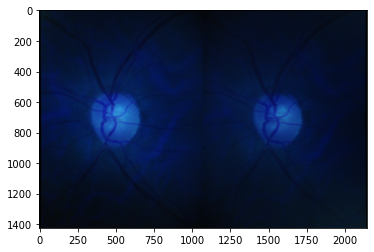

In [ ]:
img = cv2.imread(healthy[0])
plt.imshow(img)

Quick Notes:
- in here looping for each is used for each link in the variable Healthy [disini pakai looping for each untuk setiap link yang ada di healthy]
- if you wanted to use both (index and each link) use the enumarete looping
[kalau mau dua duanya (index dan each) pakainya looping enumarate]
- if you wanted to using the index, the loop should use with the range(len()), so the index which the one you should take [# kalau mau make ind pakai range(len()) nnti i nya yang diambil]
- if you wanna use the item or the object, use the for item in items: [kalau make make item atau object for item in items:]

adding healthy stereo images to the image list and array list

In [ ]:
for path in healthy:
  print(path)
  img = cv2.imread(path)
  img = cv2.resize(img, (width, height))
  list_img_stereo.append(img)
  img_array = np.array(img)
  list_array_stereo.append(img_array)

/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-1-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-64-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-28-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-30-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-24-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-37-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-2-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-33-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-11-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/healthy/healthy_stereo/N-48-R.jpg
/content/drive/MyDrive/glaucoma_

In [ ]:
print(len(list_img_stereo))
print(len(list_array_stereo))

85
85


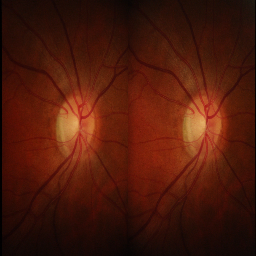

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(list_img_stereo[2])

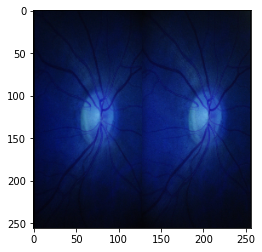

In [ ]:
plt.imshow(list_img_stereo[2])

adding glaucoma and suspected with the stereo images to the image list and array list

In [ ]:
# list_glaucoma = []
# array_glaucoma = []

In [ ]:
for path in glaucoma:
  print(path)
  img = cv2.imread(path)
  img = cv2.resize(img, (width, height))
  list_img_stereo.append(img)
  img_array = np.array(img)
  list_array_stereo.append(img)

/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-38-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-3-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/S-1-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-7-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-32-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-21-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-19-R.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-30-L.jpg
/content/drive/MyDrive/glaucoma_research/RIM-ONE-r3/dataset_v2/glaucoma_suspect/glaucoma_stereo/G-4-L.jpg
/content/drive/MyDrive/glaucoma_research/

In [ ]:
print(len(list_img_stereo))
print(len(list_array_stereo))

159
159


adding healthy masked image into the image list and array list

In [ ]:
for path in healthy_masked:
  print(path)
  img = cv2.imread(path)
  img = cv2.resize(img, (width, height))
  list_img_masked.append(img)
  img_array = np.array(img)
  list_array_masked.append(img_array)

In [ ]:
print(len(list_img_masked))
print(len(list_array_masked))

170
170


adding glaucoma and suspect masked image into image list and array list

In [ ]:
for path in glaucoma_masked:
  print(path)
  img = cv2.imread(path)
  img = cv2.resize(img, (width, height))
  list_img_masked.append(img)
  img_array = np.array(img)
  list_array_masked.append(img_array)

In [ ]:
print(len(list_img_masked))
print(len(list_array_masked))

318
318


### **U-Net Implementation**
implementasi u-net yang digunakan merupakan u-net versi pada umumnya

In [ ]:
# -- U-Net Implementation -- #


# -- Encoder -- #
# Block encoder 1

# --- start with uncommend the input and the output --- #
# inputs = Input(shape=input_size)
conv_enc_1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer=initializer)(inputs)
conv_enc_1 = Conv2D(64, 3, activation = 'relu', padding='same', kernel_initializer=initializer)(conv_enc_1)

# Block encoder 2
max_pool_enc_2 = MaxPooling2D(pool_size=(2, 2))(conv_enc_1)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_2)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_2)

# Block encoder 3
max_pool_enc_3 = MaxPooling2D(pool_size=(2,2))(conv_enc_2)
conv_enc_3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer=initializer)(max_pool_enc_3)
conv_enc_3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer=initializer)(conv_enc_3)

# Block  encoder 4
max_pool_enc_4 = MaxPooling2D(pool_size=(2, 2))(conv_enc_3)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_4)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_4)
# -- Encoder -- #

# ==== #
maxpool = MaxPooling2D(pool_size=(2, 2))(conv_enc_4)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(maxpool)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv)
# ==== #

# -- Dencode -- #
# Block decoder 1
up_dec_1 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv))
merge_dec_1 = concatenate([conv_enc_4, up_dec_1], axis = 3)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_1)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_1)

# Block decoder 2
up_dec_2 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_1))
merge_dec_2 = concatenate([conv_enc_3, up_dec_2], axis = 3)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_2)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_2)

# Block decoder 3
up_dec_3 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_2))
merge_dec_3 = concatenate([conv_enc_2, up_dec_3], axis = 3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_3)

# Block decoder 4
up_dec_4 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_3))
merge_dec_4 = concatenate([conv_enc_1, up_dec_4], axis = 3)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_4)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
conv_dec_4 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
# -- Dencoder -- #

#if start uncommend the output too
# output = Conv2D(N_CLASSES, 1, activation = 'sigmoid')(conv_dec_4)

### **Dataset Cite**

@inproceedings{
  inproceedings,
    author = {Fumero, Francisco and Sigut, Jose and Alayón, Silvia  andGonzález-Hernández, M and González de la Rosa, M},
    year = {2015},
    month = {06},
    pages = {},
    title = {Interactive Tool and Database for Optic Disc and   CupSegmentation of Stereo and Monocular Retinal Fundus Images}
}